In [1]:
# Read the dataset hour wise
import pandas as pd
dataset = pd.read_excel(r'C:\My Downloads\ML_Dataset\EnergyManagementDataset.xlsx', sheet_name = 'LogbookHourly',
                        header = 7,  usecols = 'A:K', nrows = 696)

In [2]:
dataset[-5: ]

,Log Date / Time,132KV INCOMER,BUS CAPACITOR 1600LVAR,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,BUS CAPACITOR-2 (3300kVAR),RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ]
691,29-04-2019 19:00 - 29-04-2019 20:00,18120.70,0,7600.00,3300.10,700.16,0,1200.0,2199.94,3200.00,18186.24
692,29-04-2019 20:00 - 29-04-2019 21:00,22216.70,0,7600.00,3200.00,4499.97,0,1200.0,2000.00,3699.97,22347.78
693,29-04-2019 21:00 - 29-04-2019 22:00,23724.03,0,7500.03,3200.00,5699.84,0,1300.0,2099.97,3800.06,23724.03
694,29-04-2019 22:00 - 29-04-2019 23:00,22773.76,0,7499.97,3200.00,5400.06,0,1200.0,2100.10,3300.10,22740.99
695,29-04-2019 23:00 - 30-04-2019 00:00,20676.61,0,7700.03,3299.84,3399.94,0,1200.0,2099.97,2899.97,20709.38


In [3]:
# Get the Feature name
columns = dataset.columns
columns

Index(['Log Date / Time', '132KV INCOMER', 'BUS CAPACITOR 1600LVAR',
       'RMBH O/G-1', 'CCR O/G-1', 'CMBH O/G-1', 'BUS CAPACITOR-2 (3300kVAR)',
       'RMBH O/G-2', 'CGR O/G-2', 'CMBH O/G-2', '132KV INCOMER [ kVAh ]'],
      dtype='object')

In [4]:
energy = dataset.copy()
# Drop two features related to BUS CAPACITOR
energy = energy.drop(columns = ['BUS CAPACITOR 1600LVAR', 'BUS CAPACITOR-2 (3300kVAR)' ], axis = 1)
energy_prep = energy.copy()

In [5]:
# Let's split the Time column
energy_prep['Log Date / Time'] = energy_prep['Log Date / Time'].str.split(' - ')
energy_prep['Log Date / Time'] = energy_prep['Log Date / Time'].apply(lambda x: x[1])
energy_prep['Date / Time'] = energy_prep['Log Date / Time'].str.split(' ')
energy_prep['date'] = energy_prep['Date / Time'].apply(lambda x: x[0])
energy_prep['time'] = energy_prep['Date / Time'].apply(lambda x: x[1])
energy_prep

,Log Date / Time,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],Date / Time,date,time
0,01-04-2019 01:00,22577.15,7600.00,2999.94,5699.97,1200.13,1900.00,3200.00,22544.38,"[01-04-2019, 01:00]",01-04-2019,01:00
1,01-04-2019 02:00,22249.47,7600.00,3000.06,5399.94,1100.03,1900.00,3100.03,22282.24,"[01-04-2019, 02:00]",01-04-2019,02:00
2,01-04-2019 03:00,22675.46,7600.00,2999.94,6000.00,1199.87,1800.00,3099.97,22642.69,"[01-04-2019, 03:00]",01-04-2019,03:00
3,01-04-2019 04:00,22544.38,7600.00,2900.10,5700.10,1299.97,1900.00,3100.03,22577.15,"[01-04-2019, 04:00]",01-04-2019,04:00
4,01-04-2019 05:00,22446.08,7600.00,2899.97,5799.94,1100.03,1800.00,3000.00,22446.08,"[01-04-2019, 05:00]",01-04-2019,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
691,29-04-2019 20:00,18120.70,7600.00,3300.10,700.16,1200.00,2199.94,3200.00,18186.24,"[29-04-2019, 20:00]",29-04-2019,20:00
692,29-04-2019 21:00,22216.70,7600.00,3200.00,4499.97,1200.00,2000.00,3699.97,22347.78,"[29-04-2019, 21:00]",29-04-2019,21:00
693,29-04-2019 22:00,23724.03,7500.03,3200.00,5699.84,1300.00,2099.97,3800.06,23724.03,"[29-04-2019, 22:00]",29-04-2019,22:00
694,29-04-2019 23:00,22773.76,7499.97,3200.00,5400.06,1200.00,2100.10,3300.10,22740.99,"[29-04-2019, 23:00]",29-04-2019,23:00


In [6]:
date_list = energy_prep.date.to_list()
date_list
#dates = energy_prep.loc[(energy_prep['date'] == '13-04-2019'), ['date']]
#dates2 = pd.to_datetime(dates).apply(lambda x: x.strftime('%Y-%m-%d'))
dates2 = pd.to_datetime(energy_prep['date'], format = '%d-%m-%Y')
#print (dates2.apply(lambda x: x.dt.strftime('%d-%m-%Y')))
print(dates2)

0     2019-04-01
1     2019-04-01
2     2019-04-01
3     2019-04-01
4     2019-04-01
         ...    
691   2019-04-29
692   2019-04-29
693   2019-04-29
694   2019-04-29
695   2019-04-30
Name: date, Length: 696, dtype: datetime64[ns]


In [17]:
energy_prep

,Log Date / Time,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],Date / Time,date,time
0,01-04-2019 01:00,22577.15,7600.00,2999.94,5699.97,1200.13,1900.00,3200.00,22544.38,"[01-04-2019, 01:00]",01-04-2019,01:00
1,01-04-2019 02:00,22249.47,7600.00,3000.06,5399.94,1100.03,1900.00,3100.03,22282.24,"[01-04-2019, 02:00]",01-04-2019,02:00
2,01-04-2019 03:00,22675.46,7600.00,2999.94,6000.00,1199.87,1800.00,3099.97,22642.69,"[01-04-2019, 03:00]",01-04-2019,03:00
3,01-04-2019 04:00,22544.38,7600.00,2900.10,5700.10,1299.97,1900.00,3100.03,22577.15,"[01-04-2019, 04:00]",01-04-2019,04:00
4,01-04-2019 05:00,22446.08,7600.00,2899.97,5799.94,1100.03,1800.00,3000.00,22446.08,"[01-04-2019, 05:00]",01-04-2019,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
691,29-04-2019 20:00,18120.70,7600.00,3300.10,700.16,1200.00,2199.94,3200.00,18186.24,"[29-04-2019, 20:00]",29-04-2019,20:00
692,29-04-2019 21:00,22216.70,7600.00,3200.00,4499.97,1200.00,2000.00,3699.97,22347.78,"[29-04-2019, 21:00]",29-04-2019,21:00
693,29-04-2019 22:00,23724.03,7500.03,3200.00,5699.84,1300.00,2099.97,3800.06,23724.03,"[29-04-2019, 22:00]",29-04-2019,22:00
694,29-04-2019 23:00,22773.76,7499.97,3200.00,5400.06,1200.00,2100.10,3300.10,22740.99,"[29-04-2019, 23:00]",29-04-2019,23:00


In [18]:
# Get time & Date separately
energy_prep['Log Date / Time'] = energy_prep['Log Date / Time'].str.split(' ')
energy_prep['date'] = energy_prep['Log Date / Time'].apply(lambda x: x[0])
energy_prep['hour'] = energy_prep['Log Date / Time'].apply(lambda x: x[1])

In [19]:
r = []
i = 551
for i in range (551, 575):
    i = i+1
    r.append(i)
len(r)
energy_prep['132KV INCOMER [ kVAh ]'][577]

23855.1

In [20]:
energy_prep1 = energy_prep.drop(r , axis = 0)

In [28]:
energy_prep1 = energy_prep1.drop(energy_prep1[energy_prep1['132KV INCOMER [ kVAh ]'] == 0.0].index, axis = 0)
energy_prep1 = energy_prep1.drop(energy_prep1[energy_prep1['date'] == '02-04-2019'].index, axis = 0)

In [29]:
Energy_consumption_each_day = energy_prep1.loc[(energy_prep1['date'] == '02-04-2019'), ['hour', '132KV INCOMER [ kVAh ]']]
Energy_consumption_each_day

,hour,132KV INCOMER [ kVAh ]


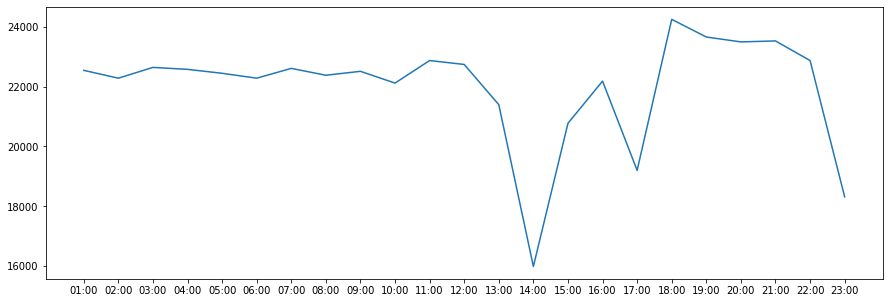

In [32]:
def EachDay(day):
    Energy_consumption_each_day = energy_prep1.loc[(energy_prep1['date'] == day), ['hour', '132KV INCOMER [ kVAh ]']]
    plt.figure(figsize = (15,5))
    plt.plot(Energy_consumption_each_day['hour'].values, Energy_consumption_each_day['132KV INCOMER [ kVAh ]'].values )
    plt.show()
EachDay('01-04-2019')

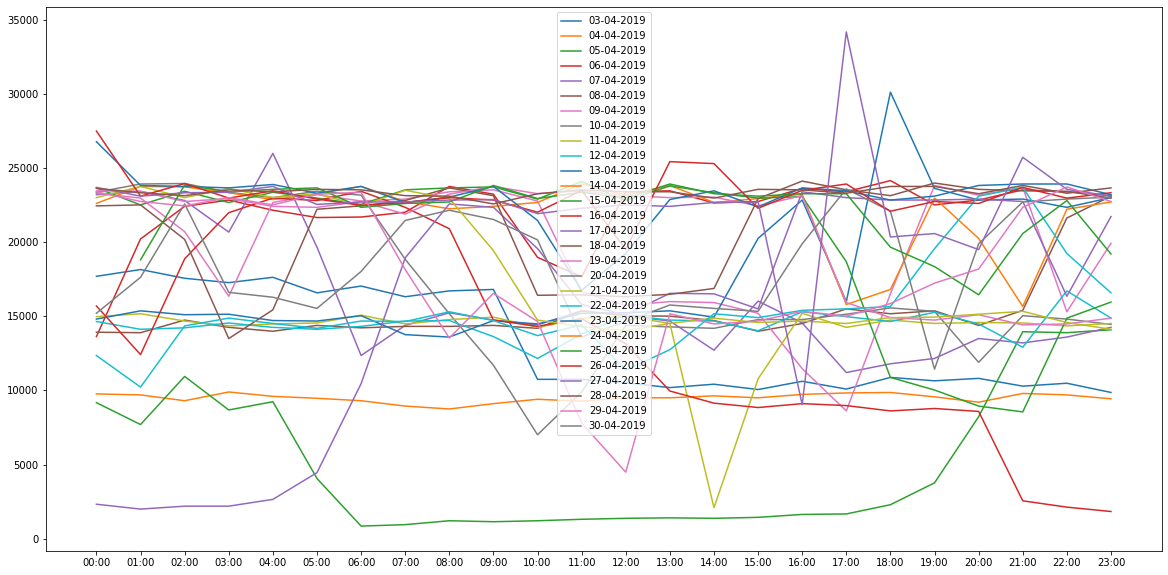

In [36]:

plt.figure(figsize = (20,10))
for dt in energy_prep1['date'][23: ].unique().tolist():
    Energy_consumption_each_day = energy_prep1[23:].loc[(energy_prep1['date'] == dt), ['hour', '132KV INCOMER [ kVAh ]']]
    plt.plot(Energy_consumption_each_day['hour'].values, Energy_consumption_each_day['132KV INCOMER [ kVAh ]'].values , label = dt)
    plt.legend()
   
plt.show()


In [37]:
energy_prep2 = energy_prep1.iloc[23: , :]
energy_prep2

,Log Date / Time,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],Date / Time,date,time,hour
47,"[03-04-2019, 00:00]",17661.95,6800.00,899.97,5699.97,0.00,600.00,3200.00,17694.72,"[03-04-2019, 00:00]",03-04-2019,00:00,00:00
48,"[03-04-2019, 01:00]",18186.24,7299.97,900.10,5800.06,199.94,500.00,3299.97,18153.47,"[03-04-2019, 01:00]",03-04-2019,01:00,01:00
49,"[03-04-2019, 02:00]",17563.65,7000.00,699.90,5799.94,99.84,600.00,3200.00,17563.65,"[03-04-2019, 02:00]",03-04-2019,02:00,02:00
50,"[03-04-2019, 03:00]",17268.74,6900.03,600.06,5700.10,0.00,600.00,3100.03,17268.74,"[03-04-2019, 03:00]",03-04-2019,03:00,03:00
51,"[03-04-2019, 04:00]",17629.18,7200.00,499.97,5899.90,0.00,400.00,3299.97,17629.18,"[03-04-2019, 04:00]",03-04-2019,04:00,04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,"[29-04-2019, 20:00]",18120.70,7600.00,3300.10,700.16,1200.00,2199.94,3200.00,18186.24,"[29-04-2019, 20:00]",29-04-2019,20:00,20:00
692,"[29-04-2019, 21:00]",22216.70,7600.00,3200.00,4499.97,1200.00,2000.00,3699.97,22347.78,"[29-04-2019, 21:00]",29-04-2019,21:00,21:00
693,"[29-04-2019, 22:00]",23724.03,7500.03,3200.00,5699.84,1300.00,2099.97,3800.06,23724.03,"[29-04-2019, 22:00]",29-04-2019,22:00,22:00
694,"[29-04-2019, 23:00]",22773.76,7499.97,3200.00,5400.06,1200.00,2100.10,3300.10,22740.99,"[29-04-2019, 23:00]",29-04-2019,23:00,23:00


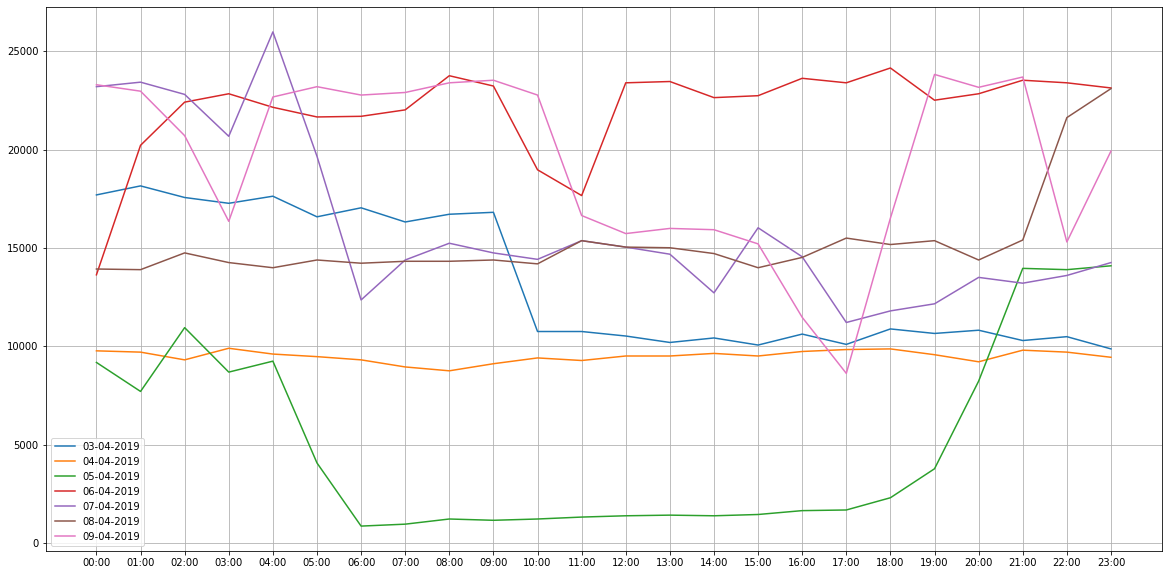

In [38]:
plt.figure(figsize = (20,10))
for dt in energy_prep2['date'].unique().tolist()[0:7]:
    Energy_consumption_each_day = energy_prep2.loc[(energy_prep2['date'] == dt), ['hour', '132KV INCOMER [ kVAh ]']]
    plt.plot(Energy_consumption_each_day['hour'].values, Energy_consumption_each_day['132KV INCOMER [ kVAh ]'].values , label = dt)
    plt.legend()
    plt.grid()
    
plt.show()

In [54]:
type(energy_prep2['date'])

pandas.core.series.Series

In [69]:
energy_day = pd.DataFrame()
for dy in energy_prep2['date'].unique().tolist():
    energy_day[dy] = energy_prep2.loc[(energy_prep2['date'] == dy), ['132KV INCOMER [ kVAh ]']].reset_index(drop = True).iloc[:, 0]
energy_day['time'] = energy_prep2['time'].reset_index(drop = True)[0:24]
energy_day.set_index(['time'])
energy_day
#energy12 = energy_prep2.loc[(energy_prep2['date'] == '03-04-2019'), ['132KV INCOMER [ kVAh ]']].reset_index(drop = True).iloc[:, 0]
#type(energy12)

,03-04-2019,04-04-2019,05-04-2019,06-04-2019,07-04-2019,08-04-2019,09-04-2019,10-04-2019,11-04-2019,12-04-2019,...,22-04-2019,23-04-2019,24-04-2019,25-04-2019,26-04-2019,27-04-2019,28-04-2019,29-04-2019,30-04-2019,time
0,17694.72,9764.86,9175.04,13631.49,23199.74,13926.40,23298.05,23363.58,14974.98,14647.30,...,12353.54,26771.46,23822.34,18808.83,27492.35,23691.26,23625.73,23396.35,20709.38,00:00
1,18153.47,9699.33,7700.48,20217.86,23429.12,13893.63,22970.37,23920.64,15171.58,14123.01,...,10223.62,23822.34,NaN,23855.10,23101.44,23101.44,23330.82,22740.99,NaN,01:00
2,17563.65,9306.11,10944.51,22413.31,22806.53,14745.60,20709.38,23953.41,14680.06,14221.31,...,14352.38,23756.80,NaN,23396.35,23953.41,23330.82,23134.21,22446.08,NaN,02:00
3,17268.74,9895.94,8683.52,22839.30,20676.61,14254.08,16351.23,23363.58,14352.38,14548.99,...,14876.67,23658.50,NaN,23560.19,22970.37,23363.58,23527.42,23003.14,NaN,03:00
4,17629.18,9601.02,9240.58,22151.17,25985.02,13991.94,22675.46,23003.14,14483.46,14254.08,...,14516.22,23887.87,NaN,23658.50,23461.89,23756.80,23396.35,22511.62,NaN,04:00
5,16580.61,9469.95,4063.23,21659.65,19660.80,14385.15,23199.74,23429.12,14548.99,14123.01,...,14188.54,23298.05,NaN,22347.78,22904.83,22544.38,23560.19,23232.51,NaN,05:00
6,17039.36,9306.11,851.97,21692.42,12353.54,14221.31,22773.76,23166.98,15073.28,14319.62,...,14680.06,23756.80,NaN,22609.92,22478.85,22708.22,23527.42,23363.58,NaN,06:00
7,16318.46,8945.66,950.27,22020.10,14385.15,14319.62,22904.83,18841.60,14483.46,14680.06,...,14647.30,22675.46,NaN,22708.22,22675.46,22708.22,23134.21,18153.47,NaN,07:00
8,16711.68,8749.06,1212.42,23756.80,15237.12,14319.62,23396.35,15171.58,14778.37,14712.83,...,15302.66,23035.90,NaN,23822.34,23003.14,22839.30,23101.44,13533.18,NaN,08:00
9,16809.98,9109.50,1146.88,23232.51,14745.60,14385.15,23527.42,11698.18,14942.21,13631.49,...,14712.83,23756.80,NaN,22937.60,22839.30,22872.06,22577.15,16547.84,NaN,09:00


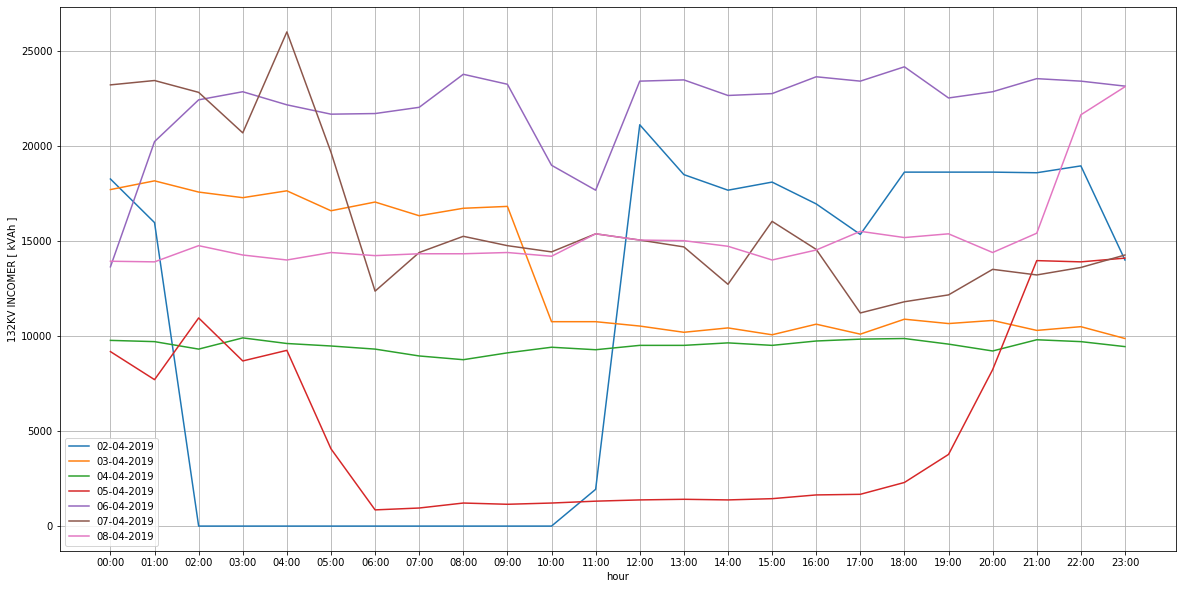

In [103]:
import seaborn as sns
plt.figure(figsize = (20,10))
for dt in energy_prep2['date'].unique().tolist()[0:7]:
    Energy_consumption_each_day = energy_prep2.loc[(energy_prep2['date'] == dt), ['hour', '132KV INCOMER [ kVAh ]']]
    sns.lineplot(x = 'hour', y = '132KV INCOMER [ kVAh ]', data = Energy_consumption_each_day,  label = dt)
    plt.legend()
    plt.grid()
    
plt.show()

In [110]:
energy_prep1

,Log Date / Time,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],date,hour,day
0,"[01-04-2019, 01:00]",22577.15,7600.00,2999.94,5699.97,1200.13,1900.00,3200.00,22544.38,2019-01-04,01:00,4
1,"[01-04-2019, 02:00]",22249.47,7600.00,3000.06,5399.94,1100.03,1900.00,3100.03,22282.24,2019-01-04,02:00,4
2,"[01-04-2019, 03:00]",22675.46,7600.00,2999.94,6000.00,1199.87,1800.00,3099.97,22642.69,2019-01-04,03:00,4
3,"[01-04-2019, 04:00]",22544.38,7600.00,2900.10,5700.10,1299.97,1900.00,3100.03,22577.15,2019-01-04,04:00,4
4,"[01-04-2019, 05:00]",22446.08,7600.00,2899.97,5799.94,1100.03,1800.00,3000.00,22446.08,2019-01-04,05:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...
691,"[29-04-2019, 20:00]",18120.70,7600.00,3300.10,700.16,1200.00,2199.94,3200.00,18186.24,2019-04-29,20:00,29
692,"[29-04-2019, 21:00]",22216.70,7600.00,3200.00,4499.97,1200.00,2000.00,3699.97,22347.78,2019-04-29,21:00,29
693,"[29-04-2019, 22:00]",23724.03,7500.03,3200.00,5699.84,1300.00,2099.97,3800.06,23724.03,2019-04-29,22:00,29
694,"[29-04-2019, 23:00]",22773.76,7499.97,3200.00,5400.06,1200.00,2100.10,3300.10,22740.99,2019-04-29,23:00,29


In [8]:
energy_prep3 = energy_prep.copy()
energy_prep3

,Log Date / Time,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],Date / Time,date,time
0,01-04-2019 01:00,22577.15,7600.00,2999.94,5699.97,1200.13,1900.00,3200.00,22544.38,"[01-04-2019, 01:00]",01-04-2019,01:00
1,01-04-2019 02:00,22249.47,7600.00,3000.06,5399.94,1100.03,1900.00,3100.03,22282.24,"[01-04-2019, 02:00]",01-04-2019,02:00
2,01-04-2019 03:00,22675.46,7600.00,2999.94,6000.00,1199.87,1800.00,3099.97,22642.69,"[01-04-2019, 03:00]",01-04-2019,03:00
3,01-04-2019 04:00,22544.38,7600.00,2900.10,5700.10,1299.97,1900.00,3100.03,22577.15,"[01-04-2019, 04:00]",01-04-2019,04:00
4,01-04-2019 05:00,22446.08,7600.00,2899.97,5799.94,1100.03,1800.00,3000.00,22446.08,"[01-04-2019, 05:00]",01-04-2019,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
691,29-04-2019 20:00,18120.70,7600.00,3300.10,700.16,1200.00,2199.94,3200.00,18186.24,"[29-04-2019, 20:00]",29-04-2019,20:00
692,29-04-2019 21:00,22216.70,7600.00,3200.00,4499.97,1200.00,2000.00,3699.97,22347.78,"[29-04-2019, 21:00]",29-04-2019,21:00
693,29-04-2019 22:00,23724.03,7500.03,3200.00,5699.84,1300.00,2099.97,3800.06,23724.03,"[29-04-2019, 22:00]",29-04-2019,22:00
694,29-04-2019 23:00,22773.76,7499.97,3200.00,5400.06,1200.00,2100.10,3300.10,22740.99,"[29-04-2019, 23:00]",29-04-2019,23:00


In [88]:
energy_prep3a = energy_prep3.iloc[0:287, :]
energy_prep3b = energy_prep3.iloc[288: , :]
energy_prep3a

,Log Date / Time,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],Date / Time,date,time
0,01-04-2019 01:00,22577.15,7600.00,2999.94,5699.97,1200.13,1900.00,3200.00,22544.38,"[01-04-2019, 01:00]",01-04-2019,01:00
1,01-04-2019 02:00,22249.47,7600.00,3000.06,5399.94,1100.03,1900.00,3100.03,22282.24,"[01-04-2019, 02:00]",01-04-2019,02:00
2,01-04-2019 03:00,22675.46,7600.00,2999.94,6000.00,1199.87,1800.00,3099.97,22642.69,"[01-04-2019, 03:00]",01-04-2019,03:00
3,01-04-2019 04:00,22544.38,7600.00,2900.10,5700.10,1299.97,1900.00,3100.03,22577.15,"[01-04-2019, 04:00]",01-04-2019,04:00
4,01-04-2019 05:00,22446.08,7600.00,2899.97,5799.94,1100.03,1800.00,3000.00,22446.08,"[01-04-2019, 05:00]",01-04-2019,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
282,12-04-2019 19:00,15237.12,7799.94,3000.06,0.00,1199.87,2099.97,1100.03,15269.89,"[12-04-2019, 19:00]",12-04-2019,19:00
283,12-04-2019 20:00,14483.46,7500.03,2799.87,0.00,1200.13,1900.03,800.00,14483.46,"[12-04-2019, 20:00]",12-04-2019,20:00
284,12-04-2019 21:00,12910.59,6700.03,2600.19,0.00,999.94,1800.00,600.06,12910.59,"[12-04-2019, 21:00]",12-04-2019,21:00
285,12-04-2019 22:00,16646.14,8400.00,3399.94,0.00,1200.13,2299.97,1200.00,16711.68,"[12-04-2019, 22:00]",12-04-2019,22:00


In [89]:
energy_prep3a['date'] = pd.to_datetime(energy_prep3a['date'], format = '%d-%m-%Y')
#energy_prep3a['date'] = energy_prep3a['date'].dt.strftime('%Y-%m-%d')
energy_prep3b['date'] = pd.to_datetime(energy_prep3b['date'])
energy_prep3b['dayofweek'] = energy_prep3b['date'].dt.day_name()
energy_prep3a['dayofweek'] = energy_prep3a['date'].dt.day_name()
#energy_prep3a['dayofweek'] = pd.to_datetime(energy_prep3a['date']).dt.day_name()
energy_prep3a['dayofweek']

C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A val

0      Monday
1      Monday
2      Monday
3      Monday
4      Monday
        ...  
282    Friday
283    Friday
284    Friday
285    Friday
286    Friday
Name: dayofweek, Length: 287, dtype: object

In [90]:
energy_prep3a

,Log Date / Time,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],Date / Time,date,time,dayofweek
0,01-04-2019 01:00,22577.15,7600.00,2999.94,5699.97,1200.13,1900.00,3200.00,22544.38,"[01-04-2019, 01:00]",2019-04-01,01:00,Monday
1,01-04-2019 02:00,22249.47,7600.00,3000.06,5399.94,1100.03,1900.00,3100.03,22282.24,"[01-04-2019, 02:00]",2019-04-01,02:00,Monday
2,01-04-2019 03:00,22675.46,7600.00,2999.94,6000.00,1199.87,1800.00,3099.97,22642.69,"[01-04-2019, 03:00]",2019-04-01,03:00,Monday
3,01-04-2019 04:00,22544.38,7600.00,2900.10,5700.10,1299.97,1900.00,3100.03,22577.15,"[01-04-2019, 04:00]",2019-04-01,04:00,Monday
4,01-04-2019 05:00,22446.08,7600.00,2899.97,5799.94,1100.03,1800.00,3000.00,22446.08,"[01-04-2019, 05:00]",2019-04-01,05:00,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,12-04-2019 19:00,15237.12,7799.94,3000.06,0.00,1199.87,2099.97,1100.03,15269.89,"[12-04-2019, 19:00]",2019-04-12,19:00,Friday
283,12-04-2019 20:00,14483.46,7500.03,2799.87,0.00,1200.13,1900.03,800.00,14483.46,"[12-04-2019, 20:00]",2019-04-12,20:00,Friday
284,12-04-2019 21:00,12910.59,6700.03,2600.19,0.00,999.94,1800.00,600.06,12910.59,"[12-04-2019, 21:00]",2019-04-12,21:00,Friday
285,12-04-2019 22:00,16646.14,8400.00,3399.94,0.00,1200.13,2299.97,1200.00,16711.68,"[12-04-2019, 22:00]",2019-04-12,22:00,Friday


In [91]:
energy_prep3b

,Log Date / Time,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],Date / Time,date,time,dayofweek
288,13-04-2019 01:00,15302.66,7600.13,3000.06,0.00,1200.13,2200.00,1200.00,15368.19,"[13-04-2019, 01:00]",2019-04-13,01:00,Saturday
289,13-04-2019 02:00,15138.82,7799.81,3099.90,0.00,1099.78,2100.03,800.00,15106.05,"[13-04-2019, 02:00]",2019-04-13,02:00,Saturday
290,13-04-2019 03:00,15106.05,7600.13,3000.06,0.00,1200.13,2099.97,1100.03,15138.82,"[13-04-2019, 03:00]",2019-04-13,03:00,Saturday
291,13-04-2019 04:00,14680.06,7599.87,2899.97,0.00,1100.03,2100.03,1000.06,14712.83,"[13-04-2019, 04:00]",2019-04-13,04:00,Saturday
292,13-04-2019 05:00,14680.06,7600.13,3000.06,0.00,1199.87,2099.97,599.94,14680.06,"[13-04-2019, 05:00]",2019-04-13,05:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,29-04-2019 20:00,18120.70,7600.00,3300.10,700.16,1200.00,2199.94,3200.00,18186.24,"[29-04-2019, 20:00]",2019-04-29,20:00,Monday
692,29-04-2019 21:00,22216.70,7600.00,3200.00,4499.97,1200.00,2000.00,3699.97,22347.78,"[29-04-2019, 21:00]",2019-04-29,21:00,Monday
693,29-04-2019 22:00,23724.03,7500.03,3200.00,5699.84,1300.00,2099.97,3800.06,23724.03,"[29-04-2019, 22:00]",2019-04-29,22:00,Monday
694,29-04-2019 23:00,22773.76,7499.97,3200.00,5400.06,1200.00,2100.10,3300.10,22740.99,"[29-04-2019, 23:00]",2019-04-29,23:00,Monday


In [93]:
energy_prep4 = pd.concat([energy_prep3a, energy_prep3b ], axis = 0)
energy_prep5 = energy_prep4[['dayofweek', 'time','132KV INCOMER [ kVAh ]' ]]
energy_prep5

,dayofweek,time,132KV INCOMER [ kVAh ]
0,Monday,01:00,22544.38
1,Monday,02:00,22282.24
2,Monday,03:00,22642.69
3,Monday,04:00,22577.15
4,Monday,05:00,22446.08
...,...,...,...
691,Monday,20:00,18186.24
692,Monday,21:00,22347.78
693,Monday,22:00,23724.03
694,Monday,23:00,22740.99


In [94]:
energy_prep6 = energy_prep5.drop(energy_prep5[energy_prep5['132KV INCOMER [ kVAh ]'] == 0.0].index, axis = 0)

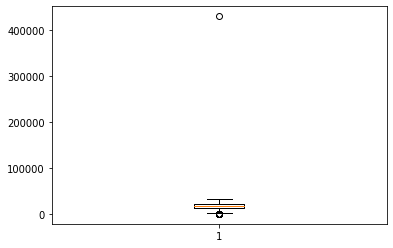

In [95]:
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(energy_prep6['132KV INCOMER [ kVAh ]'].values)
plt.show()

In [96]:
energy_prep7 = energy_prep6.drop(energy_prep6[energy_prep6['132KV INCOMER [ kVAh ]']>100000].index, axis = 0)

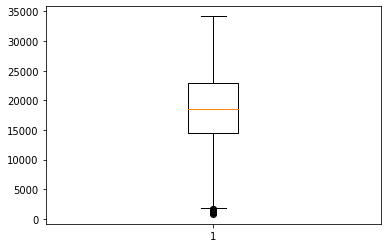

In [97]:
plt.figure()
plt.boxplot(energy_prep7['132KV INCOMER [ kVAh ]'].values)
plt.show()

In [98]:
day_mean = []
for dy in energy_prep7.dayofweek.unique():
    mean = energy_prep7[energy_prep7['dayofweek'] == dy]['132KV INCOMER [ kVAh ]'].mean()
    day_mean.append(mean)
day_mean    

[18117.399243697477,
 18271.883636363633,
 15183.70383561644,
 16562.326736842115,
 15845.71802083333,
 20309.261473684204,
 19887.445104166665]

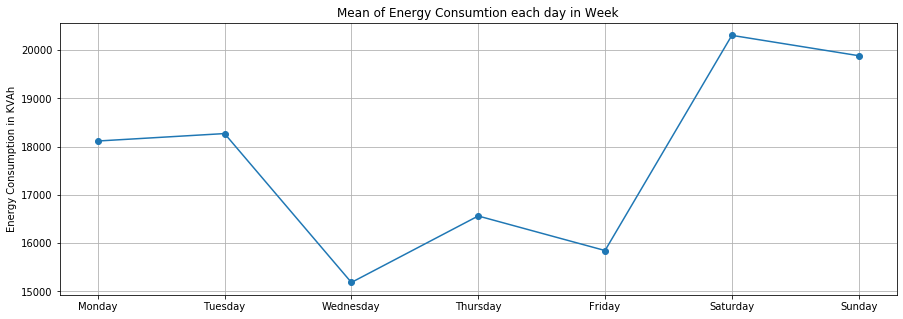

In [99]:
plt.figure(figsize=(15, 5))
plt.plot(energy_prep7.dayofweek.unique(), day_mean, marker = 'o')
plt.title('Mean of Energy Consumtion each day in Week')
plt.ylabel('Energy Consumption in KVAh')
plt.grid()
plt.show()

In [100]:
time_mean = []
for tm in energy_prep7.time.unique():
    mean = energy_prep7[energy_prep7['time'] == tm]['132KV INCOMER [ kVAh ]'].mean()
    time_mean.append(mean)
time_mean  

[18439.022142857142,
 19270.011481481484,
 18580.670740740738,
 19051.558148148146,
 18833.104074074075,
 18771.20925925926,
 18816.1137037037,
 18848.881851851853,
 18469.015555555558,
 16879.161481481475,
 15821.091785714283,
 16427.30107142857,
 17102.554285714286,
 16296.228214285718,
 17029.996785714287,
 17419.70321428571,
 17066.276071428572,
 17250.01142857143,
 17282.780000000002,
 17477.047857142858,
 18092.615714285716,
 18161.66392857143,
 17928.77714285714,
 18970.245555555553]

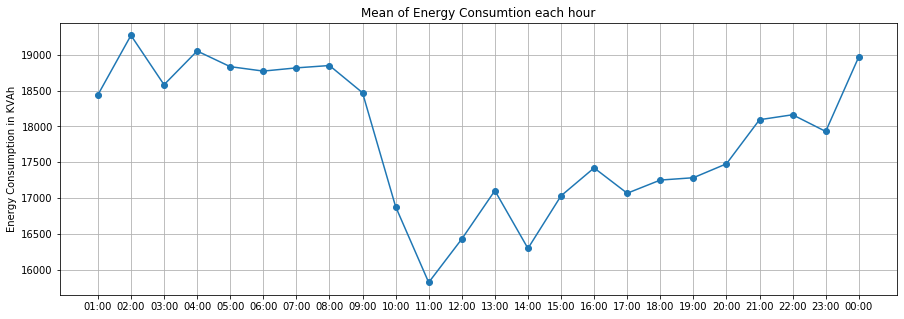

In [101]:
plt.figure(figsize=(15, 5))
plt.plot(energy_prep7.time.unique(), time_mean, marker = 'o')
plt.title('Mean of Energy Consumtion each hour')
plt.ylabel('Energy Consumption in KVAh')
plt.grid()
plt.show()

In [141]:
energy_prep7['dayofweek'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [102]:
energy_prep8 = pd.get_dummies(energy_prep7, drop_first = True)
energy_prep8

,132KV INCOMER [ kVAh ],dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,time_01:00,time_02:00,time_03:00,...,time_14:00,time_15:00,time_16:00,time_17:00,time_18:00,time_19:00,time_20:00,time_21:00,time_22:00,time_23:00
0,22544.38,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22282.24,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,22642.69,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,22577.15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22446.08,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,18186.24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
692,22347.78,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
693,23724.03,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
694,22740.99,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
correlation = energy_prep8.corr()
correlation

,132KV INCOMER [ kVAh ],dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,time_01:00,time_02:00,time_03:00,...,time_14:00,time_15:00,time_16:00,time_17:00,time_18:00,time_19:00,time_20:00,time_21:00,time_22:00,time_23:00
132KV INCOMER [ kVAh ],1.000000,0.022936,0.174650,0.145788,-0.089628,0.029606,-0.160716,0.021943,0.051056,0.026563,...,-0.055652,-0.029081,-0.014969,-0.027767,-0.021113,-0.019927,-0.012892,0.009399,0.011899,0.003466
dayofweek_Monday,0.022936,1.000000,-0.191621,-0.192797,-0.191621,-0.183299,-0.164808,-0.000650,0.002914,0.002914,...,-0.000650,-0.000650,-0.000650,-0.000650,-0.000650,-0.000650,-0.000650,-0.000650,-0.000650,-0.000650
dayofweek_Saturday,0.174650,-0.191621,1.000000,-0.168577,-0.167549,-0.160271,-0.144103,-0.000388,0.002731,0.002731,...,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388
dayofweek_Sunday,0.145788,-0.192797,-0.168577,1.000000,-0.168577,-0.161255,-0.144988,-0.001288,0.001835,0.001835,...,-0.001288,-0.001288,-0.001288,-0.001288,-0.001288,-0.001288,-0.001288,-0.001288,-0.001288,-0.001288
dayofweek_Thursday,-0.089628,-0.191621,-0.167549,-0.168577,1.000000,-0.160271,-0.144103,-0.000388,0.002731,0.002731,...,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388,-0.000388
dayofweek_Tuesday,0.029606,-0.183299,-0.160271,-0.161255,-0.160271,1.000000,-0.137844,0.006145,-0.013253,-0.013253,...,0.006145,0.006145,0.006145,0.006145,0.006145,0.006145,0.006145,0.006145,0.006145,0.006145
dayofweek_Wednesday,-0.160716,-0.164808,-0.144103,-0.144988,-0.144103,-0.137844,1.000000,-0.002099,0.000552,0.000552,...,-0.002099,-0.002099,-0.002099,-0.002099,-0.002099,-0.002099,-0.002099,-0.002099,-0.002099,-0.002099
time_01:00,0.021943,-0.000650,-0.000388,-0.001288,-0.000388,0.006145,-0.002099,1.000000,-0.043334,-0.043334,...,-0.044164,-0.044164,-0.044164,-0.044164,-0.044164,-0.044164,-0.044164,-0.044164,-0.044164,-0.044164
time_02:00,0.051056,0.002914,0.002731,0.001835,0.002731,-0.013253,0.000552,-0.043334,1.000000,-0.042520,...,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334
time_03:00,0.026563,0.002914,0.002731,0.001835,0.002731,-0.013253,0.000552,-0.043334,-0.042520,1.000000,...,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334,-0.043334


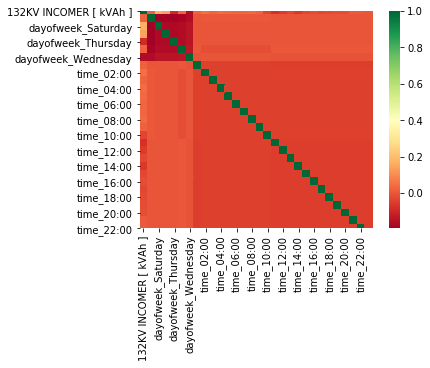

In [104]:
import seaborn as sns
plt.figure()
sns.heatmap(correlation, square = True, cmap ='RdYlGn')
plt.show()

In [105]:
X = energy_prep8.drop(['132KV INCOMER [ kVAh ]'], axis = 1)
y = energy_prep8[['132KV INCOMER [ kVAh ]']]

In [106]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(X, y)
lasso_coeff = lasso.coef_
lasso_coeff
lasso_coeff_table = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso_coeff)], axis = 1)
lasso_coeff_table.columns = ['Features_Name', 'Coeffecient']
lasso_coeff_table.sort_values(by = 'Coeffecient', ascending = False)

,Features_Name,Coeffecient
1,dayofweek_Saturday,4472.734264
2,dayofweek_Sunday,4038.279878
4,dayofweek_Tuesday,2488.264115
0,dayofweek_Monday,2278.462216
3,dayofweek_Thursday,725.799570
7,time_02:00,226.543331
9,time_04:00,8.086694
13,time_08:00,-189.692436
10,time_05:00,-205.465320
12,time_07:00,-222.458959


In [107]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha = 1)
lasso1.fit(X, y)
lasso_coeff1 = lasso.coef_
lasso_coeff_table = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso_coeff1)], axis = 1)
lasso_coeff_table.columns = ['Features_Name', 'Coeffecient']
lasso_coeff_table.sort_values(by = 'Coeffecient', ascending = False)

,Features_Name,Coeffecient
1,dayofweek_Saturday,4472.734264
2,dayofweek_Sunday,4038.279878
4,dayofweek_Tuesday,2488.264115
0,dayofweek_Monday,2278.462216
3,dayofweek_Thursday,725.799570
7,time_02:00,226.543331
9,time_04:00,8.086694
13,time_08:00,-189.692436
10,time_05:00,-205.465320
12,time_07:00,-222.458959


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [109]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_predict = lr.predict(X_test)
y_predict

array([[17277.28964233],
       [17427.29366628],
       [16841.30231622],
       [19059.3160425 ],
       [20853.01507885],
       [19604.92982017],
       [14457.59366107],
       [13713.25166221],
       [21954.71280328],
       [14949.19649272],
       [18311.20845854],
       [14713.02503243],
       [21019.50048945],
       [16701.36201888],
       [16191.34883577],
       [15596.93982469],
       [21762.64101048],
       [18368.98498966],
       [16496.99850484],
       [16307.15941509],
       [17694.79350924],
       [18619.88256954],
       [19351.87751867],
       [19362.41648002],
       [19021.42804894],
       [15055.11839583],
       [21537.31385652],
       [17193.68344629],
       [18427.81077674],
       [15735.78313717],
       [19059.3160425 ],
       [16701.36201888],
       [19246.14619093],
       [19467.42162051],
       [18389.94862957],
       [19587.74363397],
       [18736.82007763],
       [17937.30684939],
       [16252.91340024],
       [16252.91340024],


In [111]:
print (y_predict.shape)
print (y_test.shape)

(133, 1)
(133, 1)


In [142]:
# Find out the Root Mean Square error in the prediction
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
error = math.sqrt(mean_squared_error(y_test.values, y_predict))
print (error)

5622.880019527784


In [113]:
test_df = pd.DataFrame(y_test.values)
predict_df = pd.DataFrame(y_predict)
df = pd.concat([test_df, predict_df ], axis = 1)
df.columns = ['Actual', 'Predicted']
df

,Actual,Predicted
0,22904.83,17277.289642
1,23199.74,17427.293666
2,17235.97,16841.302316
3,21987.33,19059.316043
4,21528.58,20853.015079
...,...,...
128,15040.51,17694.793509
129,16547.84,14582.613864
130,9732.10,16261.501274
131,23363.58,16543.330875


In [114]:
error1 = math.sqrt(mean_squared_error(y_test.values, y_predict))
print (error1)

5622.880019527784


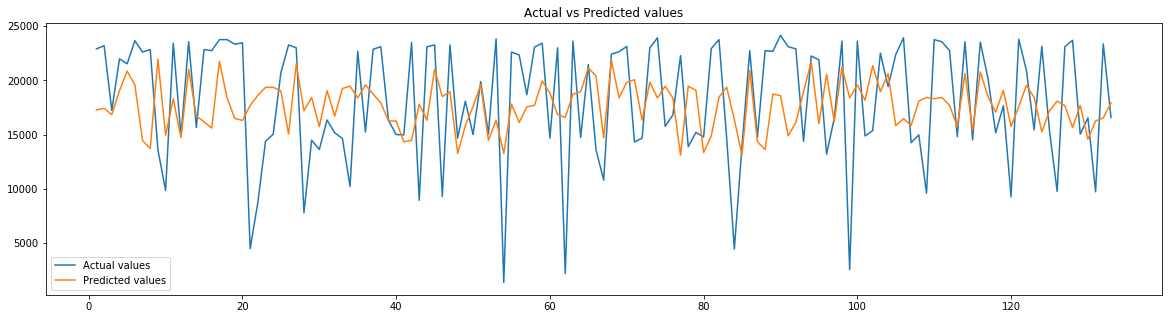

In [115]:
plt.figure(figsize = (20,5))
plt.title('Actual vs Predicted values')
plt.plot(range(1, 134), y_test, label = 'Actual values')
plt.plot(range(1, 134), y_predict, label = 'Predicted values')
plt.legend()
plt.show()

In [116]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 1234)
rfr.fit(X_train, y_train)


C:\Users\dppalai\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

In [117]:
rfr_predict = rfr.predict(X_test)
rfr_predict

array([15295.74628333, 16159.8663    , 16815.8839    , 21685.59225   ,
       19888.53516667, 16123.13033333, 12374.0188    , 13940.3824    ,
       22734.93245   , 17025.59685   , 22596.813     , 20356.57625   ,
       20922.368     , 17052.468     , 15116.96716667, 12750.30358333,
       17242.13230952, 13653.87946667, 15119.8087    , 17310.00913095,
       16707.314     , 20849.46016667, 21235.31744524, 21303.07716667,
       19556.84078571, 10395.10066667, 23745.82035   , 20632.27659048,
       20041.8921    , 15454.24854762, 21685.59225   , 17052.468     ,
       19757.13725   , 21610.6371381 , 16548.65875   , 21855.2743    ,
       19570.91548333, 19633.35725   , 15280.70205   , 15280.70205   ,
       15489.4897    , 15334.91863095, 17215.21741667, 13324.558     ,
       20922.368     , 20980.25413333, 20094.978     , 23195.921     ,
       10959.2565    , 16593.5559881 , 16263.52603333, 17418.105     ,
       13324.558     , 23195.921     , 17215.21741667,  8249.0705    ,
      

In [118]:
rfr_error = math.sqrt(mean_squared_error(y_test, rfr_predict))
rfr_error

7334.290840875962

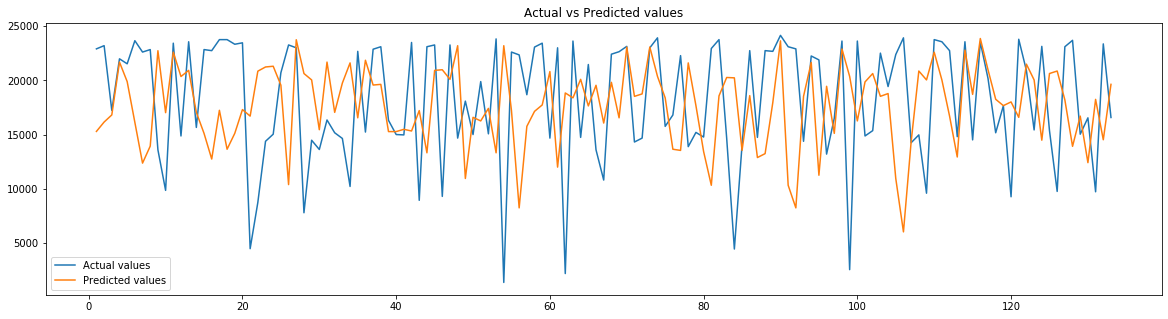

In [119]:
plt.figure(figsize = (20,5))
plt.title('Actual vs Predicted values')
plt.plot(range(1, 134), y_test, label = 'Actual values')
plt.plot(range(1, 134), rfr_predict, label = 'Predicted values')
plt.legend()
plt.show()

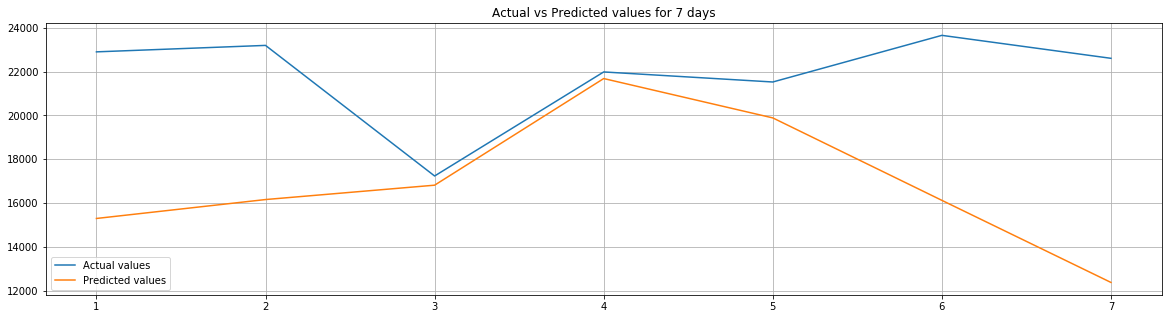

In [120]:
plt.figure(figsize = (20,5))
plt.title('Actual vs Predicted values for 7 days')
plt.plot(range(1, 8), y_test[0:7], label = 'Actual values')
plt.plot(range(1, 8), rfr_predict[0:7], label = 'Predicted values')
plt.legend()
plt.grid()
plt.show()

In [121]:
predict_rfr_df = pd.DataFrame(rfr_predict)
df2 = pd.concat([df, predict_rfr_df ], axis = 1)
df2.rename(columns = {'Predicted': 'Predicted_lr', 0: 'Predicted_rfr'}, inplace = True)
df2

,Actual,Predicted_lr,Predicted_rfr
0,22904.83,17277.289642,15295.746283
1,23199.74,17427.293666,16159.866300
2,17235.97,16841.302316,16815.883900
3,21987.33,19059.316043,21685.592250
4,21528.58,20853.015079,19888.535167
...,...,...,...
128,15040.51,17694.793509,16707.314000
129,16547.84,14582.613864,12416.889000
130,9732.10,16261.501274,18249.045150
131,23363.58,16543.330875,14528.131550


In [122]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [123]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree


In [124]:
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [125]:
reg_predict = reg.predict(X_test)

In [126]:
reg_error1 = math.sqrt(mean_squared_error(y_test, reg_predict))
reg_error2 = mean_absolute_error(y_test, reg_predict)
print ('Mean Squared Error:', reg_error1)
print ('Mean absolute Error:', reg_error2)

Mean Squared Error: 7075.686749297584
Mean absolute Error: 5713.589841987782


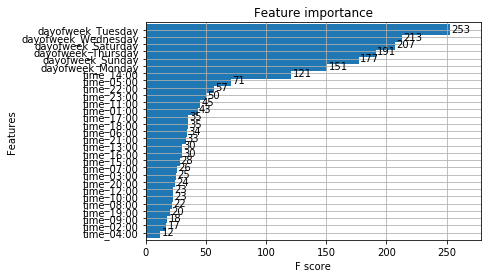

In [127]:
plot_importance(reg, height = 1.5)

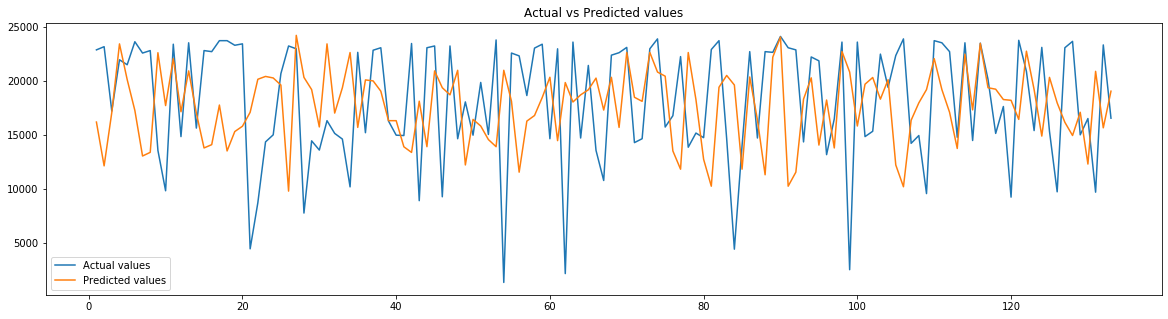

In [128]:
plt.figure(figsize = (20,5))
plt.title('Actual vs Predicted values')
plt.plot(range(1, 134), y_test, label = 'Actual values')
plt.plot(range(1, 134), reg_predict, label = 'Predicted values')
plt.legend()
plt.show()

In [129]:
predict_reg_df = pd.DataFrame(reg_predict)
df3 = pd.concat([df2, predict_reg_df ], axis = 1)
df3.rename(columns = {0: 'Predicted_reg'}, inplace = True)
df3

,Actual,Predicted_lr,Predicted_rfr,Predicted_reg
0,22904.83,17277.289642,15295.746283,16221.886719
1,23199.74,17427.293666,16159.866300,12167.636719
2,17235.97,16841.302316,16815.883900,17109.226562
3,21987.33,19059.316043,21685.592250,23458.611328
4,21528.58,20853.015079,19888.535167,20161.201172
...,...,...,...,...
128,15040.51,17694.793509,16707.314000,17126.992188
129,16547.84,14582.613864,12416.889000,12334.330078
130,9732.10,16261.501274,18249.045150,20916.455078
131,23363.58,16543.330875,14528.131550,15689.344727


In [130]:
df3['diff_lr'] = df3['Actual'] - df3['Predicted_lr']
df3['diff_rfr'] = df3['Actual'] - df3['Predicted_rfr'].apply(lambda x: abs(x))
df3['diff_reg'] = df3['Actual'] - df3['Predicted_reg'].apply(lambda x: abs(x))
df3['diff_lr'] = df3['diff_lr'].apply(lambda x: abs(x))
df3['diff_rfr'] = df3['diff_rfr'].apply(lambda x: abs(x))
df3['diff_reg'] = df3['diff_reg'].apply(lambda x: abs(x))
df3

,Actual,Predicted_lr,Predicted_rfr,Predicted_reg,diff_lr,diff_rfr,diff_reg
0,22904.83,17277.289642,15295.746283,16221.886719,5627.540358,7609.083717,6682.943281
1,23199.74,17427.293666,16159.866300,12167.636719,5772.446334,7039.873700,11032.103281
2,17235.97,16841.302316,16815.883900,17109.226562,394.667684,420.086100,126.743438
3,21987.33,19059.316043,21685.592250,23458.611328,2928.013957,301.737750,1471.281328
4,21528.58,20853.015079,19888.535167,20161.201172,675.564921,1640.044833,1367.378828
...,...,...,...,...,...,...,...
128,15040.51,17694.793509,16707.314000,17126.992188,2654.283509,1666.804000,2086.482187
129,16547.84,14582.613864,12416.889000,12334.330078,1965.226136,4130.951000,4213.509922
130,9732.10,16261.501274,18249.045150,20916.455078,6529.401274,8516.945150,11184.355078
131,23363.58,16543.330875,14528.131550,15689.344727,6820.249125,8835.448450,7674.235273


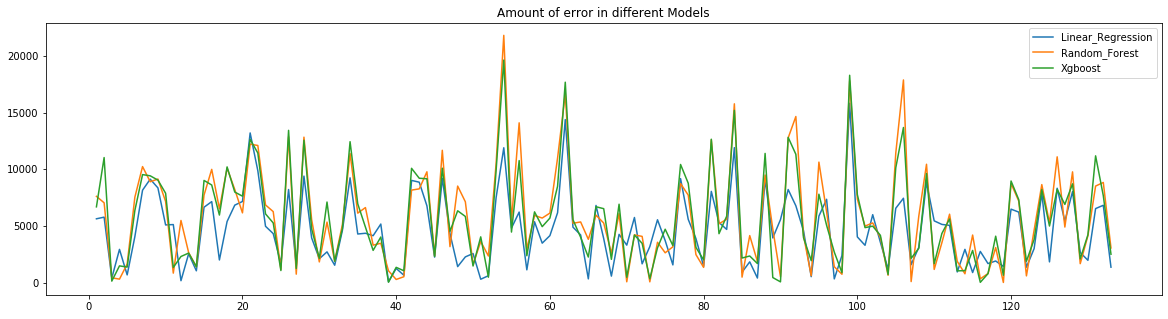

In [131]:
plt.figure(figsize = (20,5))
plt.title('Amount of error in different Models')
plt.plot(range(1, 134), df3['diff_lr'].values, label = 'Linear_Regression')
plt.plot(range(1, 134), df3['diff_rfr'].values, label = 'Random_Forest')
plt.plot(range(1, 134), df3['diff_reg'].values, label = 'Xgboost')
plt.legend()
plt.show()

In [132]:
import numpy as np
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 2)
ridge.fit(X_train, y_train)
ridge_predict1= ridge.predict(X_test)

ridge = Ridge(alpha = 5)
ridge.fit(X_train, y_train)
ridge_predict2= ridge.predict(X_test)

ridge = Ridge(alpha = 40)
ridge.fit(X_train, y_train)
ridge_predict3= ridge.predict(X_test)

ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)
ridge_predict4= ridge.predict(X_test)


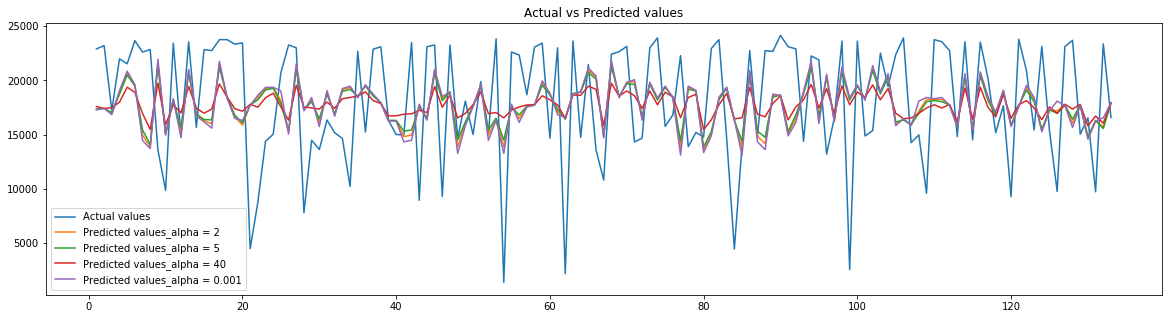

In [133]:
plt.figure(figsize = (20,5))
plt.title('Actual vs Predicted values')
plt.plot(range(1, 134), y_test, label = 'Actual values')
plt.plot(range(1, 134), ridge_predict1, label = 'Predicted values_alpha = 2')
plt.plot(range(1, 134), ridge_predict2, label = 'Predicted values_alpha = 5')
plt.plot(range(1, 134), ridge_predict3, label = 'Predicted values_alpha = 40')
plt.plot(range(1, 134), ridge_predict4, label = 'Predicted values_alpha = 0.001')
plt.legend()
plt.show()

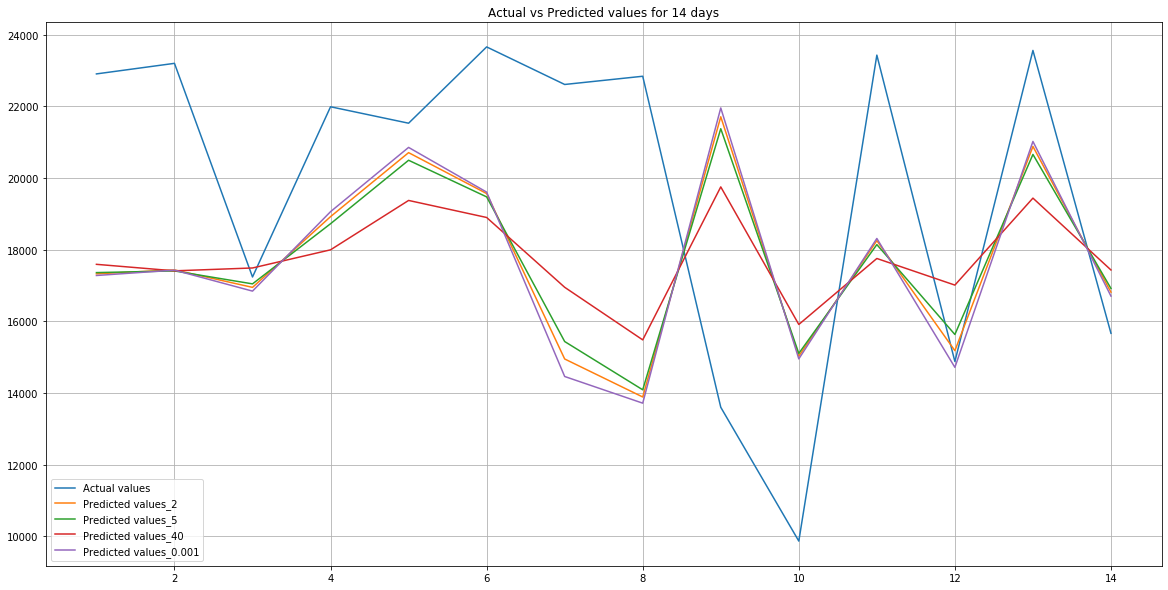

In [134]:
plt.figure(figsize = (20,10))
plt.title('Actual vs Predicted values for 14 days')
plt.plot(range(1, 15), y_test[0:14], label = 'Actual values')
plt.plot(range(1, 15), ridge_predict1[0:14], label = 'Predicted values_2')
plt.plot(range(1, 15), ridge_predict2[0:14], label = 'Predicted values_5')
plt.plot(range(1, 15), ridge_predict3[0:14], label = 'Predicted values_40')
plt.plot(range(1, 15), ridge_predict4[0:14], label = 'Predicted values_0.001')
plt.legend()
plt.grid()
plt.show()

In [135]:
energy_prep7['time'].dtype

dtype('O')

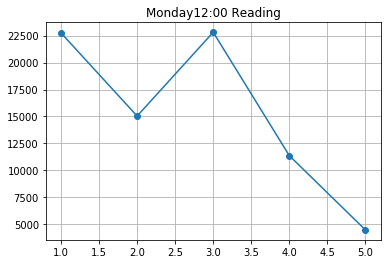

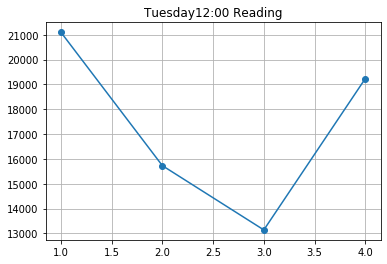

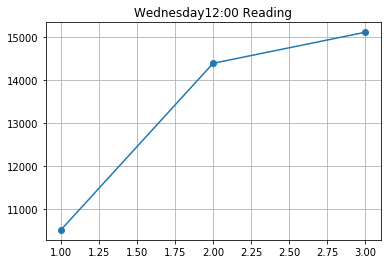

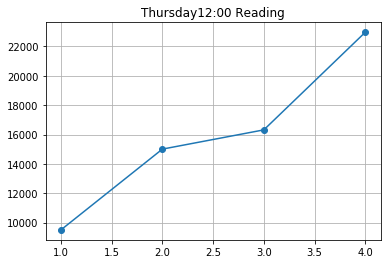

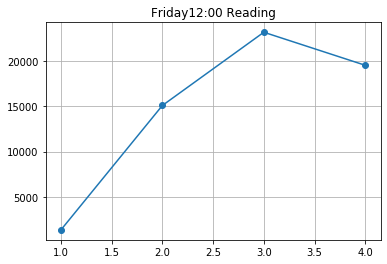

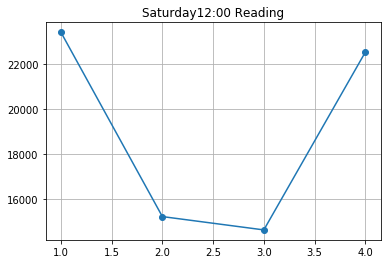

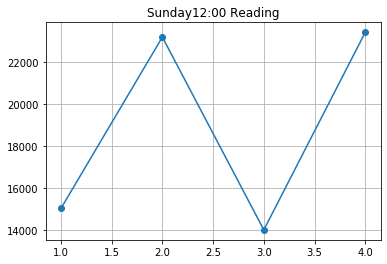

In [136]:
for wk in energy_prep7['dayofweek'].unique():
    plt.figure()
    title = wk + '12:00 Reading'
    plt.title(title)
    energy_dayofweek = energy_prep7.loc[energy_prep7['dayofweek'] == wk]
    energy_dayofweek1 = energy_dayofweek.loc[energy_prep7['time'] == '12:00']
    ln = len(energy_dayofweek1)+1
    plt.plot(range(1,ln),energy_dayofweek1['132KV INCOMER [ kVAh ]'], marker = 'o' )
    plt.grid()
    plt.show()   

In [137]:
energy_prep7['dayofweek'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [143]:
energy_prep7

,dayofweek,time,132KV INCOMER [ kVAh ]
0,Monday,01:00,22544.38
1,Monday,02:00,22282.24
2,Monday,03:00,22642.69
3,Monday,04:00,22577.15
4,Monday,05:00,22446.08
...,...,...,...
691,Monday,20:00,18186.24
692,Monday,21:00,22347.78
693,Monday,22:00,23724.03
694,Monday,23:00,22740.99


In [146]:
X1 = energy_prep7.drop(['132KV INCOMER [ kVAh ]'], axis = 1)
y1 = energy_prep7[['132KV INCOMER [ kVAh ]']]

In [147]:
X_train1, X_test1, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.2, random_state = 1234)

In [148]:
reg1 = xgb.XGBRegressor()
reg1.fit(X_train1, y_train2, eval_set=[(X_train1, y_train2), (X_test1, y_test2)],verbose=False)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields dayofweek, time